# Final Project CSC-301

***
# Topic: Principal Component Analysis


### Objectives:
### 1. Apply `PCA` on the `sklearn` breast cancer dataset for data visualization(using the conceptual and in-built method).
### 2. Find the optimal number of principal components based on the accuracies of several classification models (`SVM`, `logistic regression`, `K-nearest-neighbord`). 

### 3. Compare the time it takes to train a simple deep learning model (`MLP Classifier`) using `PCA` and not using PCA
   
***
## Table of Content: 

## 1. [Theoretical background](#section1)
## 2. [Importing libraries](#section2)
## 3. [Load and Explore the dataset](#section3)
   **3a) [Loading the data and setting up the dataframe](#section3)**
   
   **3b) [Changing to more descriptive labels](#section3b)**
   
   **3c) [Plot the correlation matrix](#section3c)**

## 4. [Data visualization using PCA](#section4)
 **4a) [Data Visualization without using the inbuilt method](#section4a)**
 
 **4b) [Data Visualization using the inbuilt method](#section4b)**

## 5. [Classification Models using different number of components](#section5)
 **5a) [K-nearest neighbor classfication](#section5a)**
 
 **5b) [Logistic Regression](#section5b)**

 **5c) [Support vector Classification](#section5c)**
## 6. [Speed up Deep learning models](#section6)
## 7. [Conclusions](#section7)

***
## 1. Theoretical background <a class = "anchor" id = "section1"> </a>

### What is PCA? 
  * PCA is an unsupervised learning algorithm that finds relations among features within a dataset.
  * Often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still constains most of the information in the large set. 
  * The idea of PCA is to try to preserve the essential parts that have more variation in the data and remove the non-essential parts (the parts with fewer variations). 
    
### Steps of Principal Component Analsysis:
   1. **Standardization**
          The aim of this step is to standardize the range of the continuous initial variables so that each one of them contr-ibutes equally to the analysis.
   2. **Covariance matrix computation**
          The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them.
   3. **Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components**
          The aim of this step is to find the eigenvectors and eigenvalues. These linear algebra concepts are needed to deter-mine the principal components of the data. The eigenvectors of the covariance matrix are the directions of the axes where there is the most variance (most information) and that’s what we call principal components. On the other hand, eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each principal component. 
   4. **Get the feature vector**
          Choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.
   5. **Recast the data along the principal components axes**
          Use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the origin_al axes to the ones represented by the principal components
          
### Some applications of PCA:
  * `Data Visualization`
  * `Speeding ML algorithm`
   
   
  

***
# Importing Libraries <a class = "anchor" id = "section2"> </a>

In [1]:
!pip install mlxtend

In [2]:
import time
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions


from sklearn import neighbors, linear_model, svm, neural_network


from scipy.linalg import eigh

import matplotlib.pyplot as plt
%matplotlib inline

***
# Load and explore the dataset<a class = "anchor" id = "section3"> </a>

 - We will use `sklearn` module datasets and import the Breast Cancer dataset. 
 - From `load_breast_cancer` we can get the labels and the data. 
 - The data has 569 samples with thirty features, and each sample has a label associated with it. There are two labels in this dataset (0 and 1).

In [3]:
breast = load_breast_cancer()

# load the dataset
breast_data = breast.data

# Load the target labels 
breast_labels = breast.target
breast_labels = np.reshape(breast_labels,(569,1))

# Store everything in a dataframe
features = breast.feature_names
features_labels = np.append(features,['label','verbose label'] )
final_breast_data = np.concatenate([breast_data,breast_labels, breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data, columns = features_labels)


**Let's check all the 30 features our dataset has**

In [4]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

**Let's check the dataframe we will be working, its shape and a summary of the datapoints and descriptive statistics**

In [5]:
breast_dataset.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,verbose label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,0.0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,0.0


In [6]:
breast_dataset.shape

(569, 32)

In [7]:
breast_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
breast_dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,verbose label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000,1.000000


**The original labels are in binary format (0's and 1's). Let's change our label to a more meaningful form. We will use the `.replace` function to change the labels to beningn and malignant.**  <a class = "anchor" id = "section3b"> </a>

In [9]:
breast_dataset['verbose label'].replace(0, 'Benign',inplace=True)
breast_dataset['verbose label'].replace(1, 'Malignant',inplace=True)

breast_dataset.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,verbose label
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0,Malignant


**Let's check the correlation matrix** <a class = "anchor" id = "section3c"> </a>

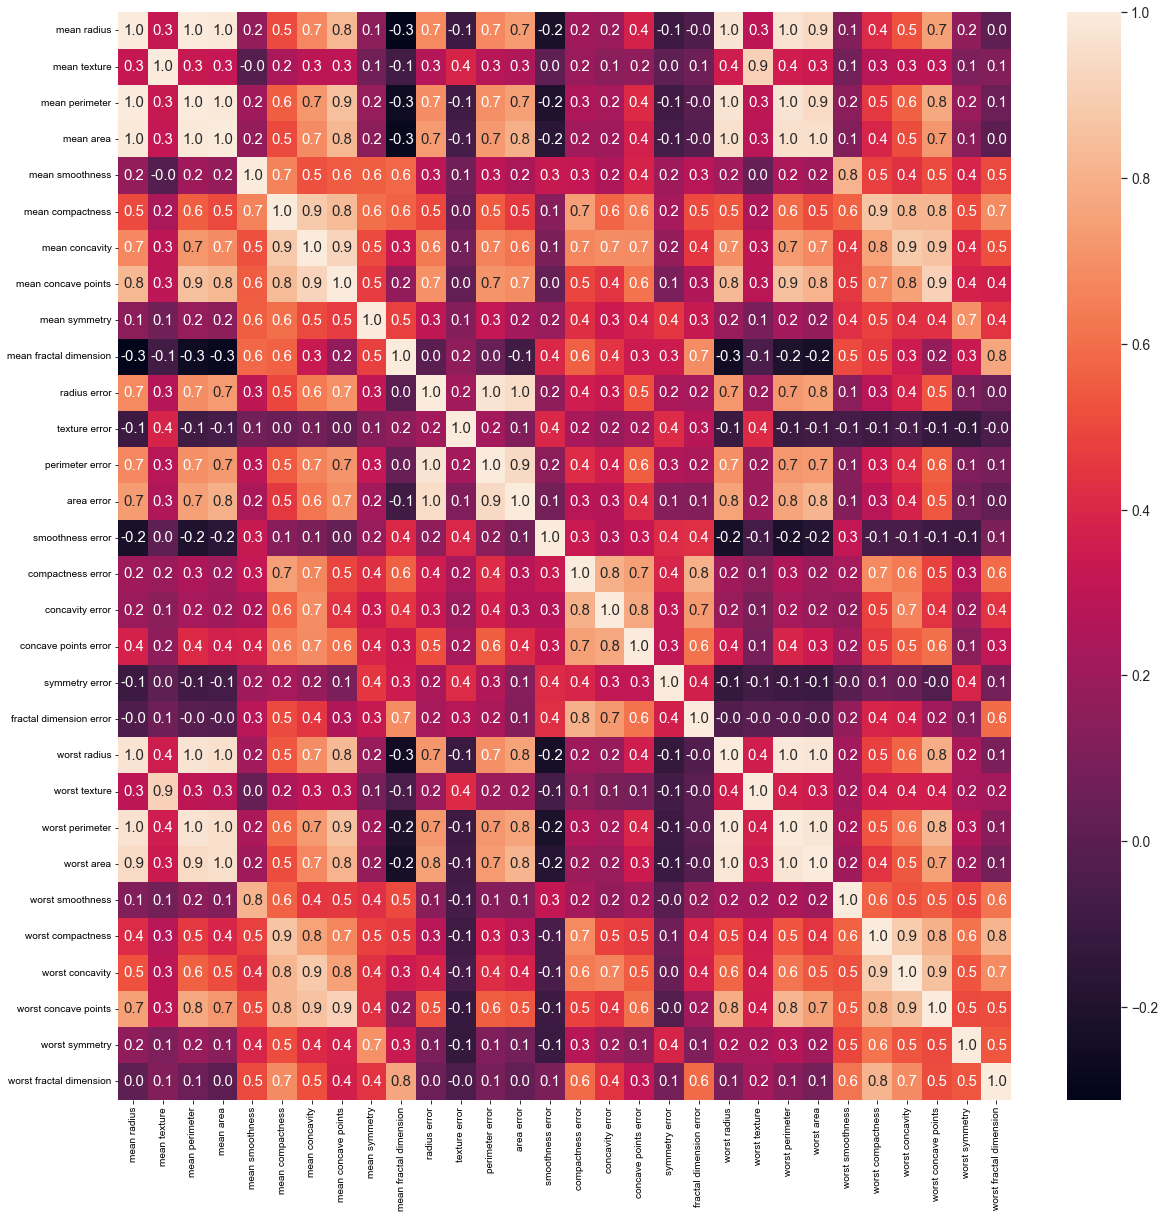

In [10]:
corr = breast_dataset.loc[:,features].corr()

#plotting a heatmap to learn about the correlations
f, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=1.25)
sns.heatmap(corr, annot= True, fmt='.1f')
plt.show()

Malignant    357
Benign       212
Name: verbose label, dtype: int64


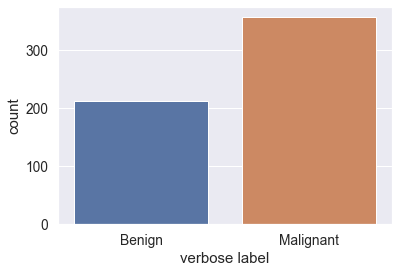

In [11]:
sns.countplot( x = 'verbose label', data = breast_dataset)
freq = breast_dataset['verbose label'].value_counts()

print( freq)

**From the above output, we can see that our data has 357 samples labeled as malignant from the 569 samples**

***
# Data visualization using PCA <a class = "anchor" id = "section4"> </a>

Before performing PCA, we have to standardize our data since PCA's output is influenced based on the scale of the features of the data.

We can normalize our data by using the `StandardScaler` module from the `sklearn` library 

### PCA without using scikit-learn directly <a class = "anchor" id = "section4a"> </a>

#### 1.) Standardization

In [12]:
# Separate the features and the target 
x = breast_dataset.loc[:,features].values
y = breast_dataset["verbose label"].values

In [13]:
# Normalize the data
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

**Let's check if the data is actually normalized (meaning it has a mean of zero and a standard deviation of one)**

In [14]:
mean, std = np.mean(x),np.std(x)

print( f"mean: {mean}\nstd: {std}" )

mean: -6.826538293184326e-17
std: 1.0


#### 2.) Covariance matrix computation

In [15]:
# Compute the covariance matrix
cov_matrix = np.matmul( x.T, x)
print("The dimension of the covariance matrix is:", cov_matrix.shape)

The dimension of the covariance matrix is: (30, 30)


#### 3.) Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

In [16]:
# finding the top 2 eigen values and corresponding eigenvectors

# compute the eigenvectors
ev = eigh(cov_matrix, eigvals_only = True)
print(ev)

# The function eigh will retur the eigenvalues in ascending order
e_values_1, e_vectors_1 = eigh(cov_matrix, eigvals = (28,29))

# we use (28,29) to generate only the largest and the second largest eigen values


[7.57025042e-02 4.26068962e-01 9.04333249e-01 3.92636394e+00
 4.65307708e+00 8.80884341e+00 1.02732990e+01 1.38499367e+01
 1.56130200e+01 1.70545766e+01 1.77297000e+01 2.81527497e+01
 2.99400878e+01 3.37980525e+01 4.54419337e+01 5.35627951e+01
 8.93385328e+01 1.37332415e+02 1.48600820e+02 1.67238031e+02
 1.99544577e+02 2.37213148e+02 2.71195153e+02 3.84200245e+02
 6.86985912e+02 9.38127682e+02 1.12698443e+03 1.60341297e+03
 3.23838077e+03 7.55723477e+03]


#### 4 & 5) Get the feature vector and recast the data along the principal component axes

In [17]:
print('The shape of the eigen vectors is: ', e_vectors_1.shape)
e_vectors_1 = e_vectors_1.T

#converting into 2D shape for ease
print('Changed shape of eigen vectors is (the transposed version): ', e_vectors_1.shape)


The shape of the eigen vectors is:  (30, 2)
Changed shape of eigen vectors is (the transposed version):  (2, 30)


In [18]:
#projecting the data on the 2D plane
new_coordinates_1 = np.matmul(e_vectors_1, x.T)

print('The shape of the resultant new data points is: ', 
      e_vectors_1.shape,'X', x.T.shape, 
      '=', new_coordinates_1.shape)

# append labels to the 2D projected data
new_coordinates_1 = np.vstack( (new_coordinates_1, y)).T

# create a new dataframe for plotting the labeled points
plot_df = pd.DataFrame( data = new_coordinates_1, 
                       columns = ('1st Principal Component', '2nd Principal Component', 'Labels' ))

print( plot_df.head())

The shape of the resultant new data points is:  (2, 30) X (30, 569) = (2, 569)
  1st Principal Component 2nd Principal Component  Labels
0                1.948583               -9.192837  Benign
1               -3.768172               -2.387802  Benign
2               -1.075174               -5.733896  Benign
3               10.275589               -7.122953  Benign
4               -1.948072               -3.935302  Benign


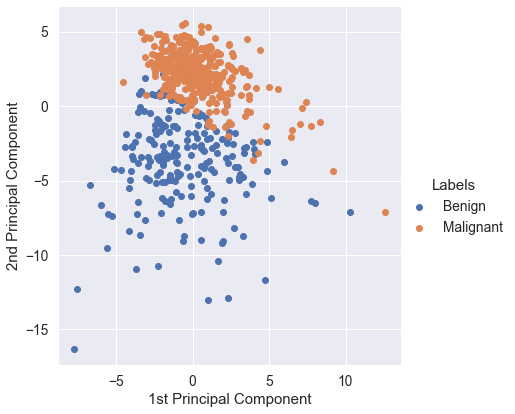

In [19]:
#plotting 2D datapoints 
sns.FacetGrid(plot_df, hue='Labels', height=6).map(plt.scatter, '1st Principal Component', 
                                                 '2nd Principal Component').add_legend()
plt.show()

**Now let's do the same but this time we use the second and third component**

In [20]:
e_values_2, e_vectors_2 = eigh(cov_matrix, eigvals = (27,28))
# (27,28) will generate only the second largest and the third largest eigen values


print('The shape of the eigen vectors is: ', e_vectors_2.shape)

e_vectors_2 = e_vectors_2.T
#converting into 2D shape for easiness
print('Changed shape of eigen vectors is (The transposed version): ', e_vectors_2.shape)


The shape of the eigen vectors is:  (30, 2)
Changed shape of eigen vectors is (The transposed version):  (2, 30)


In [21]:
#projecting the data on the 2D plane of 1st and 3rd components
new_coordinates_2 = np.matmul(e_vectors_2, x.T)
print('The shape of the resultant new data points is: ', e_vectors_2.shape,'X',x.T.shape, '=', new_coordinates_2.shape)

The shape of the resultant new data points is:  (2, 30) X (30, 569) = (2, 569)


In [22]:
#appending labels to the 2D projected data
new_coordinates_2 = np.vstack((new_coordinates_2, y)).T

#creating a new dataframe for plotting the labeled points
plot_df_2 = pd.DataFrame(data=new_coordinates_2, columns=('2nd Principal Component',
                                                          '3rd Principal Component', 'Labels'))
print(plot_df_2.head())

  2nd Principal Component 3rd Principal Component  Labels
0               -1.123166                1.948583  Benign
1               -0.529293               -3.768172  Benign
2               -0.551748               -1.075174  Benign
3                -3.23279               10.275589  Benign
4                1.389767               -1.948072  Benign


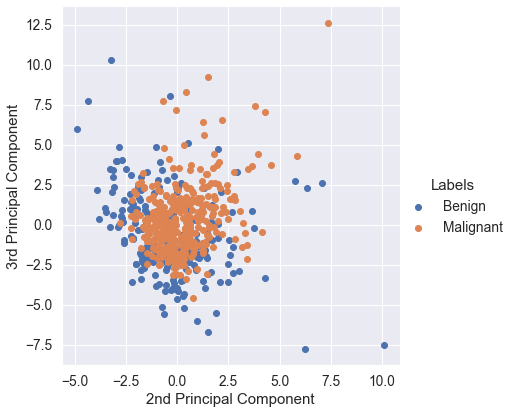

In [23]:
#plotting 2D datapoints 
sns.FacetGrid(plot_df_2, hue='Labels', height=6).map(plt.scatter, '2nd Principal Component', 
                                                     '3rd Principal Component').add_legend()
plt.show()

### PCA using scikit-learn directly <a class = "anchor" id = "section4b"> </a>

We can use the `sklearn` library to import the `PCA` module, and choose the number of components we want to use. Here the several component represent the lower dimension in which we will project the higher dimension data.

### Before we replicate the calculation of PCA using scikit library, let's visualize how much variation each  principal components holds
Once we have the principal components, we can find the `explained_variance_ratio`. It will tell us the amount of information (variance) that each principal component holds after projecting the data to a lower dimensional subspace.

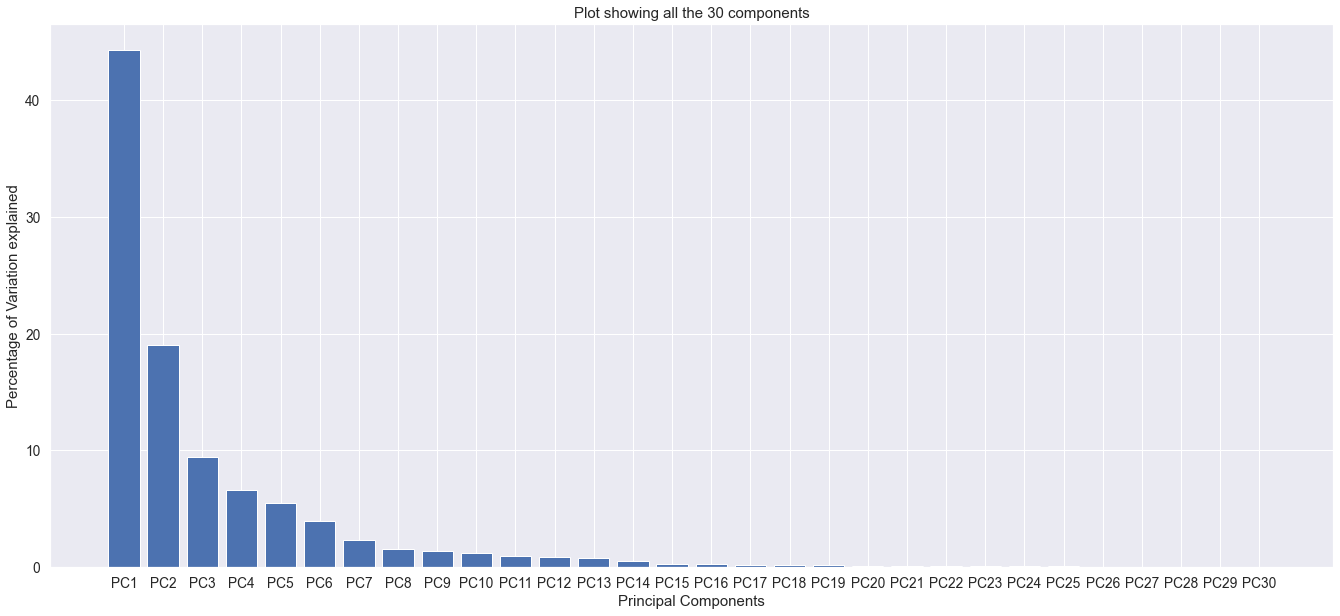

In [24]:
pca_breast = PCA()

pca_breast.fit_transform(x)

# calculate the percentage of variation that each principal component accounts for
percent_var = np.round( pca_breast.explained_variance_ratio_*100, decimals =1 )
PCA_labels = [ 'PC' + str(i) for i in range(1,len(percent_var) +1)]

# plot the graph to see the contribution of each principal component
f, ax = plt.subplots( figsize =(23,10))
plt.bar(x = range(1,len(percent_var)+1), height = percent_var, tick_label = PCA_labels )
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Plot showing all the 30 components')
plt.show()

From the above graph, we can see that most of the amount of information (variation) is at the first three principal components (as expected). In that case, let's focus our attention in using the first 3 components. 

### Principal component analysis with 3 components

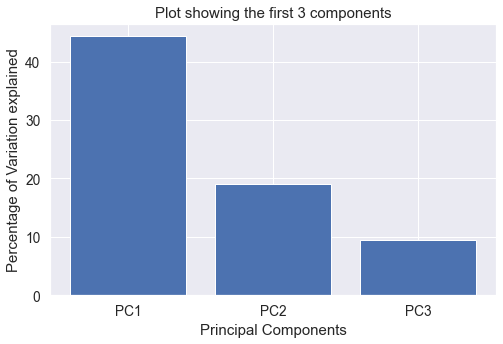

In [25]:
pca_breast = PCA(n_components = 3)
pca_breast.fit_transform(x)

# calculate the percentage of variation that each first 3 principal component accounts for
percent_var = np.round( pca_breast.explained_variance_ratio_*100, decimals = 1)
pca_labels = ['PC' + str(i) for i in range(1,len(percent_var)+1)]

# plot a graph to see their contributions
f,ax = plt.subplots(figsize = (8,5))
plt.bar( x = range(1,len(percent_var)+1), height = percent_var, tick_label = pca_labels)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Plot showing the first 3 components')
plt.show()

Let's create a dataframe containing the variance of the first 3 principal components

In [26]:
explained_var = pca_breast.explained_variance_ratio_

cum_var = np.cumsum(np.round(explained_var, decimals = 3))
cum_var_perc = cum_var*100


#creating a dataframe with the components
pc_df = pd.DataFrame(['PC1','PC2', 'PC3'], columns=['PC'])
explained_var_df = pd.DataFrame(explained_var, columns=['Explained variance'])
cum_var_df = pd.DataFrame(cum_var_perc, columns=['Cumulative variance (in %)'])

# Now let's join all the info
total_var_explained = pd.concat([pc_df, explained_var_df, cum_var_df], axis=1)
total_var_explained

,PC,Explained variance,Cumulative variance (in %)
0,PC1,0.442720,44.3
1,PC2,0.189712,63.3
2,PC3,0.093932,72.7


From the above dataframe, we can see that `principal component 1` holds ~44.2720% of the information while the `principal commponent 2` holds ~18.9712% of the information and lastly `principal component 3` accounts for ~9.3932%. Giving us a cumulative variance of ~72.7%. Hence, while projecting the thirty-dimensional data to a three dimensional data, we lost ~27.3% of the information.

Yes, accuracy does get compromised a bit but the simplicity gained is worth much more as we can see bellow. We reduce the working data severly by going from a thirty dimensional data to a three dimensional data and only losing ~27.3% of the accuracy 

In [27]:
pca_breast_data = pca_breast.fit_transform(x)


print('The initial data has the following dimensions: ', breast_dataset.loc[:,features].values.shape)
print('The reduced data is of the dimension: ', pca_breast_data.shape)

The initial data has the following dimensions:  (569, 30)
The reduced data is of the dimension:  (569, 3)


### Let's see some data visualization by using 2 principal component 

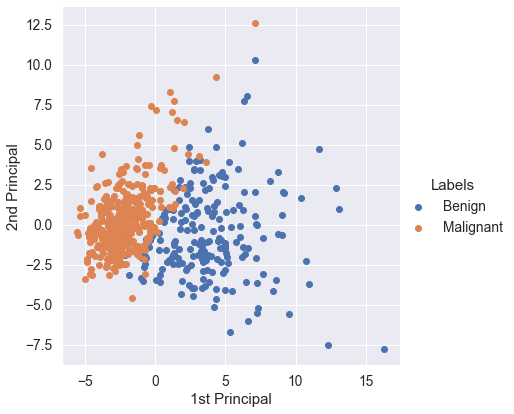

In [28]:
pca_2C = PCA( n_components = 2) 
pca_2C_data = pca_2C.fit_transform(x)
pca_2C_data = np.vstack( (pca_2C_data.T, y)).T

# display them in a dataframe 
pca_2C_df = pd.DataFrame(data = pca_2C_data, columns = ('1st Principal', '2nd Principal', 'Labels') )

sns.FacetGrid( pca_2C_df, hue = 'Labels', height = 6).map( plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

## Classification Models using different number of components<a class = "anchor" id = "section5"> </a>


### Preprocessing Data

In [29]:
# Separate the features and the target 
x = breast_dataset.loc[:,features].values
y = breast_dataset["label"].astype(int).values

x.shape, y.shape

((569, 30), (569,))

In [30]:
# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1729)

print( "Train data shapes: ", (x_train.shape, y_train.shape))
print( "Test data shapes: ", (x_test.shape, y_test.shape))

Train data shapes:  ((455, 30), (455,))
Test data shapes:  ((114, 30), (114,))


In [31]:
# Perform feature scaling for normalizing the data
std_scaler = StandardScaler()

x_train_std = std_scaler.fit_transform(x_train)
x_test_std = std_scaler.fit_transform(x_test)

print( f"The mean of the normalized data is {np.mean(x_train_std)}" )
print( f"The standard deviation of the normalized data is {np.std(x_train_std)}")

The mean of the normalized data is 1.0410882575239563e-16
The standard deviation of the normalized data is 1.0


## KNN Classification<a class = "anchor" id = "section5a"> </a>

### KNN classification using PCA with 2 components

In [32]:
new_pca = PCA(n_components=2)

train_data_PCA2 = new_pca.fit_transform(x_train_std)
test_data_PCA2 = new_pca.fit_transform(x_test_std)
 


new_KNNclassifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
new_KNNclassifier.fit(train_data_PCA2, y_train)

KNeighborsClassifier()

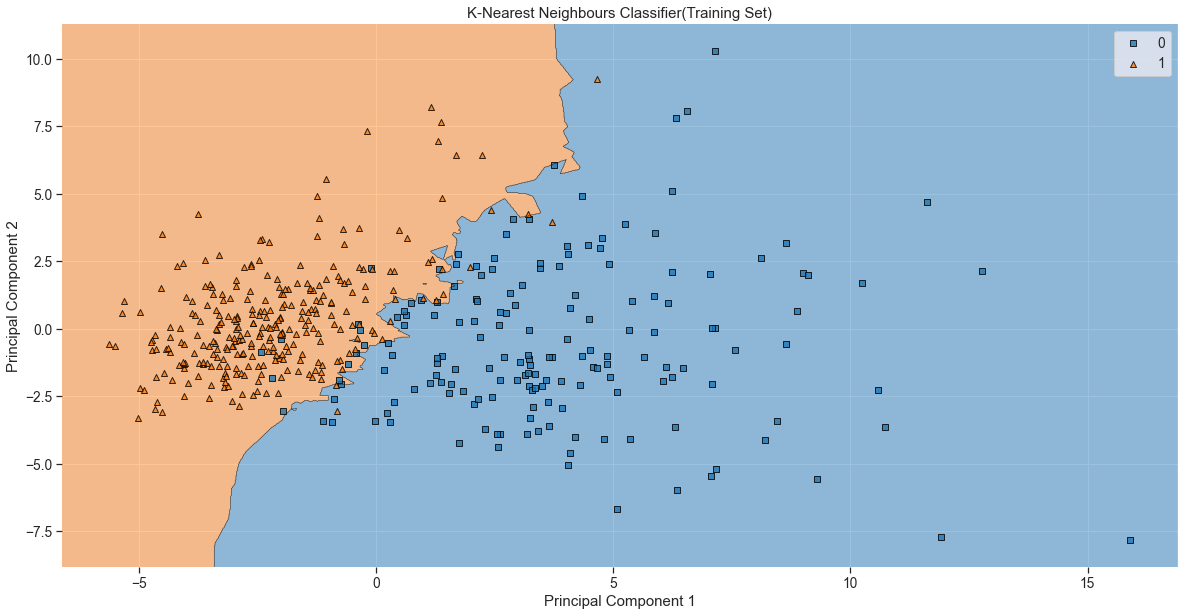

In [33]:
plt.figure( figsize = (20,10))
plot_decision_regions( train_data_PCA2 ,y_train, clf = new_KNNclassifier)
plt.title('K-Nearest Neighbours Classifier(Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

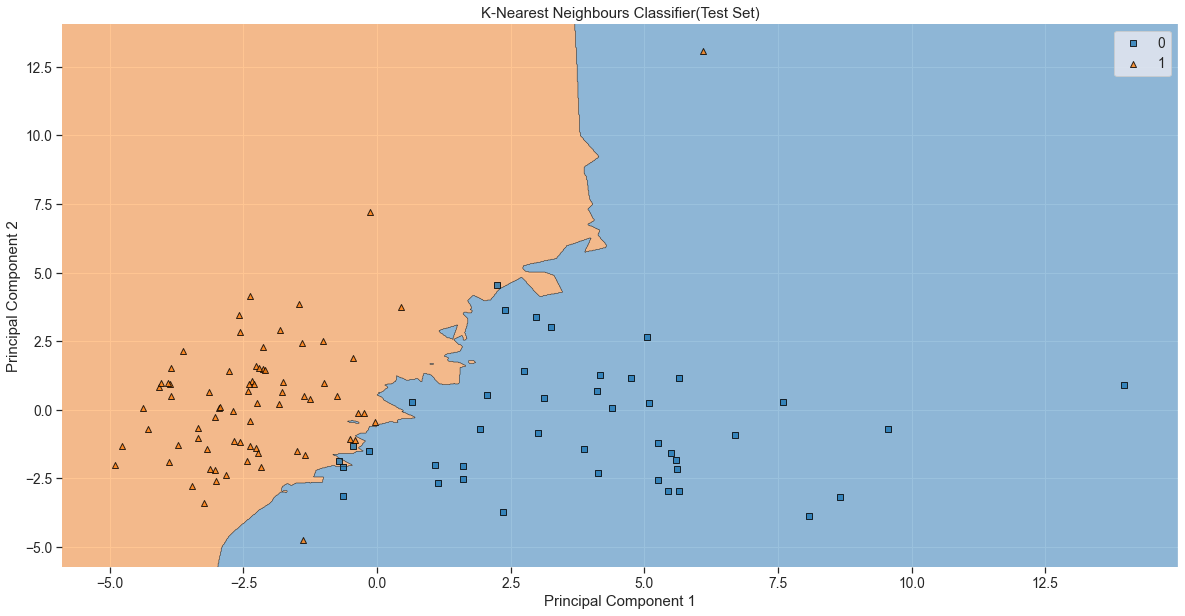

In [34]:
plt.figure( figsize = (20,10))
plot_decision_regions( test_data_PCA2 ,y_test, clf = new_KNNclassifier)
plt.title('K-Nearest Neighbours Classifier(Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [35]:
train_score = new_KNNclassifier.score( train_data_PCA2, y_train) # Calculate the score from the training data set
test_score  = new_KNNclassifier.score( test_data_PCA2, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9472527472527472
The test score of model is:  0.956140350877193


### KNN classification using PCA with 3 components

In [36]:
new_pca = PCA(n_components=3)

train_data_PCA3 = new_pca.fit_transform(x_train_std)
test_data_PCA3 = new_pca.fit_transform(x_test_std)
 


new_KNNclassifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
new_KNNclassifier.fit(train_data_PCA3, y_train)

KNeighborsClassifier()

In [37]:
train_score = new_KNNclassifier.score( train_data_PCA3, y_train) # Calculate the score from the training data set
test_score  = new_KNNclassifier.score( test_data_PCA3, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9560439560439561
The test score of model is:  0.9385964912280702


### KNN classification using PCA with 4 components

In [38]:
new_pca = PCA(n_components=4)

train_data_PCA4 = new_pca.fit_transform(x_train_std)
test_data_PCA4 = new_pca.fit_transform(x_test_std)
 


new_KNNclassifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
new_KNNclassifier.fit(train_data_PCA4, y_train)

KNeighborsClassifier()

In [39]:
train_score = new_KNNclassifier.score( train_data_PCA4, y_train) # Calculate the score from the training data set
test_score  = new_KNNclassifier.score( test_data_PCA4, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9582417582417583
The test score of model is:  0.9473684210526315


### KNN classification using PCA with 5 components

In [40]:
new_pca = PCA(n_components=5)

train_data_PCA5 = new_pca.fit_transform(x_train_std)
test_data_PCA5 = new_pca.fit_transform(x_test_std)
 


new_KNNclassifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
new_KNNclassifier.fit(train_data_PCA5, y_train)

KNeighborsClassifier()

In [41]:
train_score = new_KNNclassifier.score( train_data_PCA5, y_train) # Calculate the score from the training data set
test_score  = new_KNNclassifier.score( test_data_PCA5, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9692307692307692
The test score of model is:  0.9649122807017544


### KNN classification using PCA with 6 components

In [42]:
new_pca = PCA(n_components=6)

train_data_PCA6 = new_pca.fit_transform(x_train_std)
test_data_PCA6 = new_pca.fit_transform(x_test_std)
 


new_KNNclassifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
new_KNNclassifier.fit(train_data_PCA6, y_train)

KNeighborsClassifier()

In [43]:
train_score = new_KNNclassifier.score( train_data_PCA6, y_train) # Calculate the score from the training data set
test_score  = new_KNNclassifier.score( test_data_PCA6, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9692307692307692
The test score of model is:  0.9385964912280702


## Logistic Regression<a class = "anchor" id = "section5b"> </a>

### Logistic Regression using PCA with 2 components

In [44]:
logistic_regression = linear_model.LogisticRegression().fit(train_data_PCA2, y_train) 
logistic_regression

LogisticRegression()

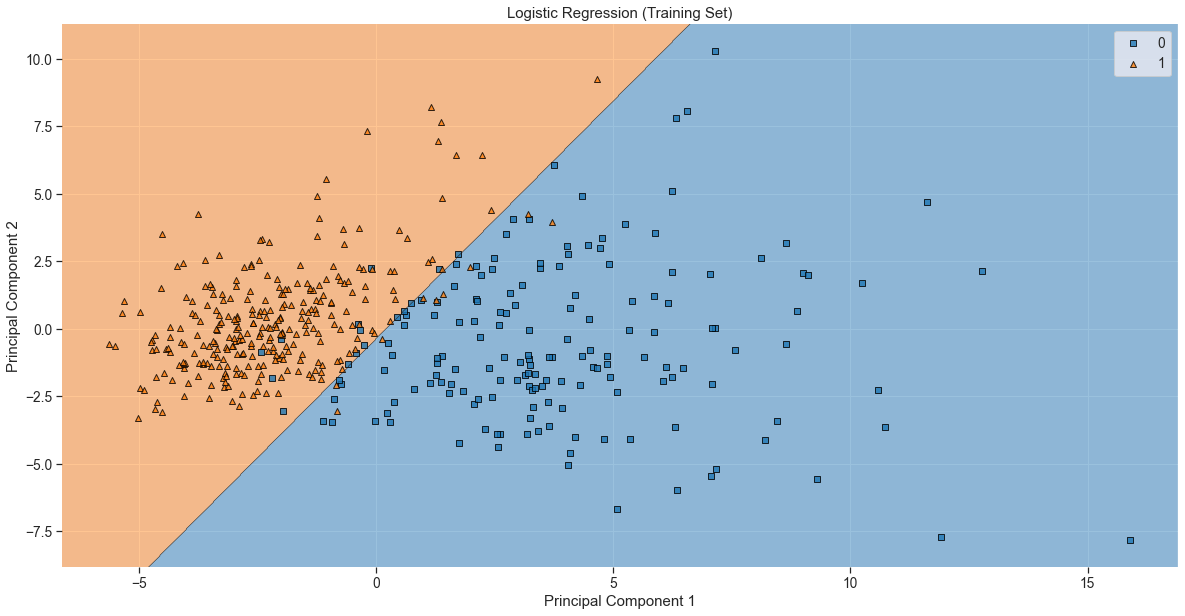

In [45]:
plt.figure( figsize = (20,10))
plot_decision_regions( train_data_PCA2 ,y_train, clf = logistic_regression)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

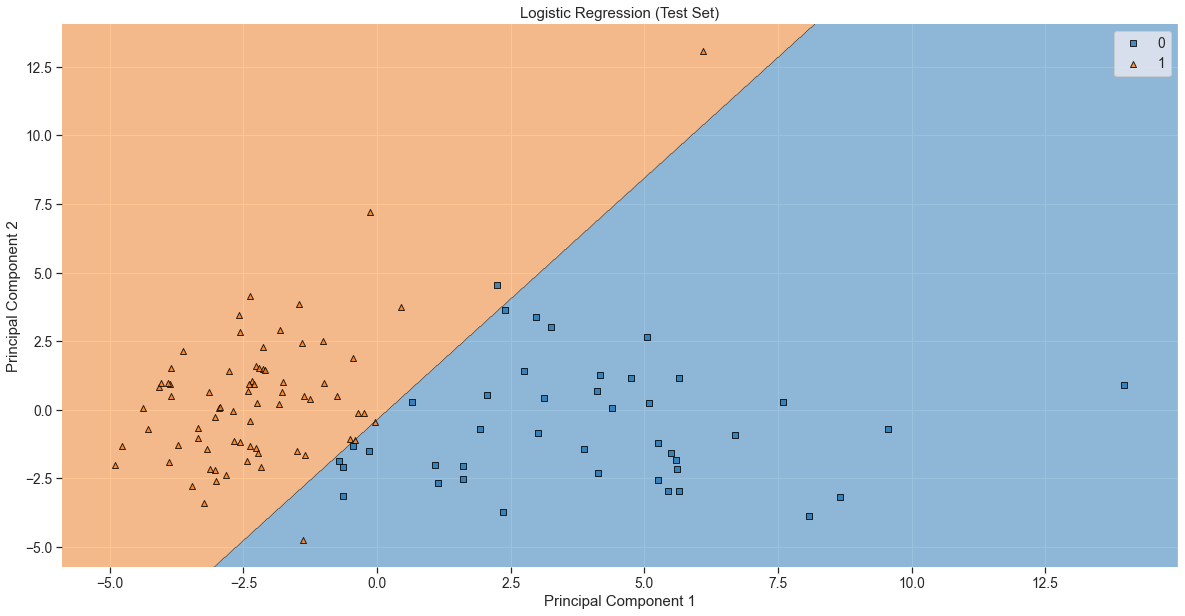

In [46]:
plt.figure( figsize = (20,10))
plot_decision_regions( test_data_PCA2 ,y_test, clf = logistic_regression)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [47]:
train_score = logistic_regression.score( train_data_PCA2, y_train) # Calculate the score from the training data set
test_score  = logistic_regression.score( test_data_PCA2, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9494505494505494
The test score of model is:  0.9649122807017544


### Logistic Regression using PCA with 3 components

In [48]:
logistic_regression = linear_model.LogisticRegression().fit(train_data_PCA3, y_train) 
logistic_regression

LogisticRegression()

In [49]:
train_score = logistic_regression.score( train_data_PCA3, y_train) # Calculate the score from the training data set
test_score  = logistic_regression.score( test_data_PCA3, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9516483516483516
The test score of model is:  0.9649122807017544


### Logistic Regression using PCA with 4 components

In [50]:
logistic_regression = linear_model.LogisticRegression().fit(train_data_PCA4, y_train) 
logistic_regression

LogisticRegression()

In [51]:
train_score = logistic_regression.score( train_data_PCA4, y_train) # Calculate the score from the training data set
test_score  = logistic_regression.score( test_data_PCA4, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9692307692307692
The test score of model is:  0.9912280701754386


### Logistic Regression using PCA with 5 components

In [52]:
logistic_regression = linear_model.LogisticRegression().fit(train_data_PCA5, y_train) 
logistic_regression

LogisticRegression()

In [53]:
train_score = logistic_regression.score( train_data_PCA5, y_train) # Calculate the score from the training data set
test_score  = logistic_regression.score( test_data_PCA5, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9692307692307692
The test score of model is:  0.956140350877193


### Logistic Regression using PCA with 6 components

In [54]:
logistic_regression = linear_model.LogisticRegression().fit(train_data_PCA6, y_train) 
logistic_regression

LogisticRegression()

In [55]:
train_score = logistic_regression.score( train_data_PCA6, y_train) # Calculate the score from the training data set
test_score  = logistic_regression.score( test_data_PCA6, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9758241758241758
The test score of model is:  0.9298245614035088


## Support Vector Classification<a class = "anchor" id = "section5c"> </a>

### Support Vector Classification using PCA with 2 components

In [56]:
# i. Use sklearn to train a Support Vector Classifier on the training set
svmClassifier = svm.SVC( kernel = 'linear', probability = True)
svmClassifier.fit( train_data_PCA2, y_train)

SVC(kernel='linear', probability=True)

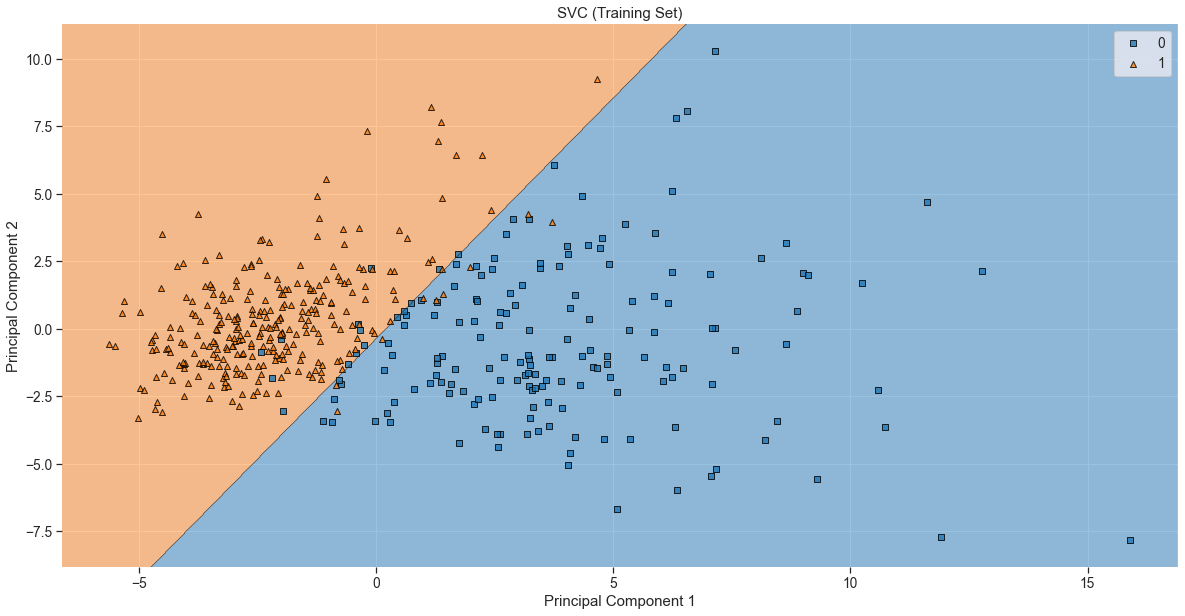

In [57]:
plt.figure( figsize = (20,10))
plot_decision_regions( train_data_PCA2 ,y_train, clf = svmClassifier)
plt.title('SVC (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

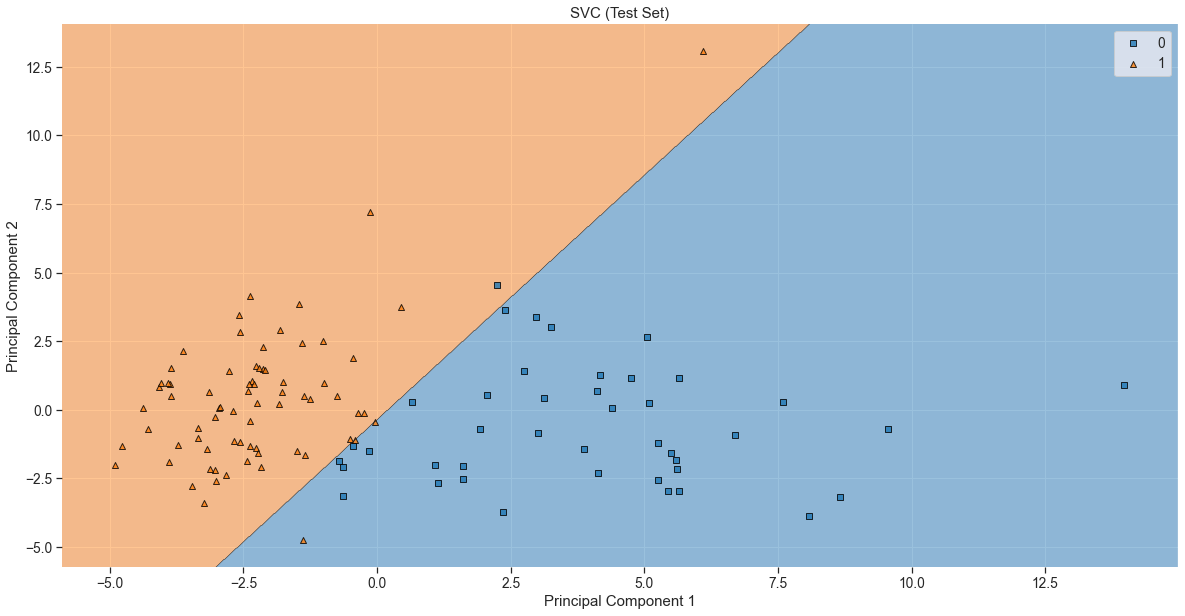

In [58]:
plt.figure( figsize = (20,10))
plot_decision_regions( test_data_PCA2 ,y_test, clf = svmClassifier)
plt.title('SVC (Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [59]:
train_score = svmClassifier.score( train_data_PCA2, y_train) # Calculate the score from the training data set
test_score  = svmClassifier.score( test_data_PCA2, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9516483516483516
The test score of model is:  0.9649122807017544


### Support Vector Classification using PCA with 3 components

In [60]:
svmClassifier.fit( train_data_PCA3, y_train)

SVC(kernel='linear', probability=True)

In [61]:
train_score = svmClassifier.score( train_data_PCA3, y_train) # Calculate the score from the training data set
test_score  = svmClassifier.score( test_data_PCA3, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9560439560439561
The test score of model is:  0.9649122807017544


### Support Vector Classification using PCA with 4 components

In [62]:
svmClassifier.fit( train_data_PCA4, y_train)

train_score = svmClassifier.score( train_data_PCA4, y_train) # Calculate the score from the training data set
test_score  = svmClassifier.score( test_data_PCA4, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.967032967032967
The test score of model is:  1.0


### Support Vector Classification using PCA with 5 components

In [63]:
svmClassifier.fit( train_data_PCA5, y_train)

train_score = svmClassifier.score( train_data_PCA5, y_train) # Calculate the score from the training data set
test_score  = svmClassifier.score( test_data_PCA5, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.967032967032967
The test score of model is:  0.9473684210526315


### Support Vector Classification using PCA with 6 components

In [64]:
svmClassifier.fit( train_data_PCA6, y_train)

train_score = svmClassifier.score( train_data_PCA6, y_train) # Calculate the score from the training data set
test_score  = svmClassifier.score( test_data_PCA6, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9714285714285714
The test score of model is:  0.9385964912280702


## PCA second application: Speed up Deep learning models <a class = "anchor" id = "section6"> </a>

## Neural Networks

In [65]:
start_time = time.time()
neuralNetworkModel = neural_network.MLPClassifier(random_state = 1, hidden_layer_sizes = (100000,), solver = 'lbfgs',
                                                  max_iter = 10000000, activation = 'logistic' ).fit(x_train_std, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 489.66247272491455 seconds ---


In [66]:
train_score = neuralNetworkModel.score( x_train_std, y_train) # Calculate the score from the training data set
test_score  = neuralNetworkModel.score(x_test_std, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9912087912087912
The test score of model is:  0.9649122807017544


### MLP Classifier using PCA with 2 components

In [67]:
start_time = time.time()
neuralNetworkModel = neural_network.MLPClassifier(random_state = 1, hidden_layer_sizes = (100000,), solver = 'lbfgs',
                                                  max_iter = 10000000, activation = 'logistic' ).fit(train_data_PCA2, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 37.95064043998718 seconds ---


In [68]:
train_score = neuralNetworkModel.score( train_data_PCA2, y_train) # Calculate the score from the training data set
test_score  = neuralNetworkModel.score( test_data_PCA2, y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.9538461538461539
The test score of model is:  0.9649122807017544


***
## Conclusions <a class = "anchor" id = "section7"> </a>

The accuracy results (in %) obtained from the classification analysis can be tabulated as follows:

| Number of principal components       | K-nearest Neighbours | Logistic Regression | Linear SVM   |
| ------------------------------------ | ---------------------|-------------------- |--------------|
|           2                          |       95.6140        |       96.4912       |    96.4912   |
|           3                          |       93.8596        |       96.4912       |    96.4912   |
|         **4**                        |     **94.7368**      |     **99.1128**     |   **1.0**    |
|           5                          |       96.4912        |       95.6140       |    94.7368   |
|           6                          |       93.8596        |       92.9824       |    93.8596   |

If we look closely at the table, the following points can be concluded: 
* When using 5 principal components, KNN gives the greatest accuracy while linear SVM gives the lowest.
* KNN reaches the maximum accuracy at about 96.5% while using 5 principal components.
* Logistic Regression and Linear SVM reach their maximum accuracy (close to 1.0) while using 4 principal component.

Since one of our objective was to decrease the dimension of the data while retaining the maximum information, I think it is safe to say that the optimum number of principal components should be 4.

We also wanted to apply PCA's application of speeding up deep learning models, the results are as follow: 


|             Models                   |      accuracy(train data) | accuracy (test data) | training time (in seconds)  |
| ------------------------------------ | ---------------------|-------------------- |--------------|
|      30-dimensional data (without reducing data)                          |       99.1208        |       96.4912       |    489.6624   |
|      using 2 principal components                          |       95.3846        |       96.4912       |    37.9506   |

In this simple example, we can see how reducing our data can severely reduce the traing time (less than 10 times and to be more precise using PCA took less than a minute while not using PCA took around 8 minutes) and PCA allows us to keep as much information as possible (meaning that our accuracy remains acceptable).